In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import csv

In [2]:
import numpy as np
import math

In [3]:
SuperCon_coords = np.genfromtxt("supercon (1).DAT", delimiter='\t', dtype=str)

In [4]:
SuperCon_coords = SuperCon_coords.astype(np.float64)
print(SuperCon_coords)

[[-26.29823   2.16962  11.     ]
 [-26.21429   2.22162  11.     ]
 [-26.14667   2.26234  11.     ]
 ...
 [ 16.92529  14.0345   15.     ]
 [ 16.92852  13.60385  15.     ]
 [ 16.97454  14.44753  15.     ]]


In [5]:
maxcluster = 0
for i in range(int(np.size(SuperCon_coords, 0))):
    if SuperCon_coords[i][2] > maxcluster:
        maxcluster = SuperCon_coords[i][2]
print(maxcluster)

23.0


In [6]:
Prediction_coords = np.genfromtxt("predictions (1).DAT", delimiter='\t', dtype=str)
Prediction_coords = Prediction_coords.astype(np.float64)
print(Prediction_coords)

[[-24.8755    2.38979  11.     ]
 [-24.67991   2.27967  11.     ]
 [-24.52637   4.62937  11.     ]
 ...
 [ 21.9321    0.93621   3.     ]
 [ 21.93486   0.95855   3.     ]
 [ 21.96234   0.72508   3.     ]]


In [7]:
np.size(Prediction_coords, 0)

797

In [8]:
maxcluster_p = 0
for i in range(int(np.size(Prediction_coords, 0))):
    if Prediction_coords[i][2] > maxcluster_p:
        maxcluster_p = Prediction_coords[i][2]
print(maxcluster_p)

24.0


In [22]:
rindices = np.random.choice(Prediction_coords.shape[0], 100, replace=False)

In [9]:
# num_display = 1000
# import random
# rand_indicies = []
# for i in range(num_display):
#     addednum = False
#     while addednum is False:
#         x = random.randint(0, num_display-1)
#         if x not in rand_indicies:
#             rand_indicies.append(x)
#             addednum = True

In [10]:
# Prediction_coords = Prediction_coords[rand_indicies]
# print(Prediction_coords)
# print(np.size(Prediction_coords, 0))
# assert (np.size(Prediction_coords, 0) == num_display)

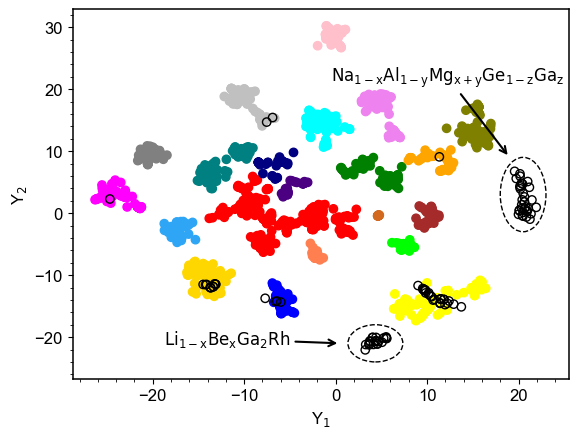

In [25]:
from matplotlib import rcParams, cycler
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib.ticker import AutoMinorLocator


rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.size'] = 12
rcParams['axes.linewidth'] = 1.1
# rcParams['axes.labelpad'] = 10.0
# plot_color_cycle = cycler('color', ['000000', '0000FE', 'FE0000', '008001', 'FD8000', '8c564b', 
#                                     'e377c2', '7f7f7f', 'bcbd22', '17becf'])
# rcParams['axes.prop_cycle'] = plot_color_cycle
# rcParams['axes.xmargin'] = 0
# rcParams['axes.ymargin'] = 0
# rcParams.update({
#                  "axes.autolimit_mode" : "round_numbers",
#                  "xtick.major.size"     : 7,
#                  "xtick.minor.size"     : 3.5,
#                  "xtick.major.width"    : 1.1,
#                  "xtick.minor.width"    : 1.1,
#                  "xtick.major.pad"      : 5,
#                  "xtick.minor.visible" : True,
#                  "ytick.major.size"     : 7,
#                  "ytick.minor.size"     : 3.5,
#                  "ytick.major.width"    : 1.1,
#                  "ytick.minor.width"    : 1.1,
#                  "ytick.major.pad"      : 5,
#                  "ytick.minor.visible" : True,
#                  "lines.markersize" : 10,
#                  "lines.markerfacecolor" : "none",
#                  "lines.markeredgewidth"  : 0.8})
rcParams.update({
                 "xtick.minor.visible" : True,
                 "ytick.minor.visible" : True,
})


custom_colors = {
    1: 'blue', 2: 'red', 3: 'purple', 4: 'yellow', 5: 'green',
    6: 'orange', 7: 'pink', 8: 'brown', 9: 'gray', 10: 'cyan',
    11: 'magenta', 12: 'lime', 13: 'maroon', 14: 'navy', 15: 'olive',
    16: 'teal', 17: 'violet', 18: '#FFD700', # gold
    19: '#C0C0C0', # silver
    20: '#FF7F50', # coral
    21: '#D2691E', # chocolate
    22: 'indigo', 23: '#2fa6f5',
#     24: '#FA8072'  # salmon
}

fig, ax = plt.subplots()

ellipse1 = Ellipse((4.35, -21), width=6, height=6, edgecolor='black', facecolor='none', linestyle='--', zorder=3)
ax.add_patch(ellipse1)

ellipse2 = Ellipse((20.5, 3), width=5, height=12, edgecolor='black', facecolor='none', linestyle='--', zorder=3)
ax.add_patch(ellipse2)



# Assuming SuperCon_coords is a NumPy array with your data

# Apply custom colors with a default color for unmatched keys
colors = [custom_colors.get(cluster, 'black') for cluster in SuperCon_coords[:, 2]]

# Plotting the t-SNE clusters
plt.scatter(SuperCon_coords[:, 0], SuperCon_coords[:, 1], color=colors, zorder = 2)

# Overlaying Prediction_coords as black open circles
plt.scatter(Prediction_coords[rindices][:, 0], Prediction_coords[rindices][:, 1], facecolors='none', edgecolors='black', zorder = 2)

# Setting axis labels with subscripts using LaTeX-style formatting
plt.xlabel(r'Y$_{1}$')  # Label for the x-axis with subscript
plt.ylabel(r'Y$_{2}$')  # Label for the y-axis with subscript

# Adding text with thinner arrows pointing to the ellipses
plt.annotate('$\mathrm{Li_{1-x}Be_{x}Ga_{2}Rh}$', xy=(0.5, -21), xytext=(-5, -22),
             arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=1.5),
             horizontalalignment='right', verticalalignment='bottom')

# plt.annotate('$\mathrm{NaAlGa_{1-x}Ge_{x}}$', xy=(20, 10), xytext=(25, 20),
#              arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=1.5),
#              horizontalalignment='right', verticalalignment='bottom')

plt.annotate('$\mathrm{Na_{1-x}Al_{1-y}Mg_{x+y}Ge_{1-z}Ga_{z}}$', xy=(19, 9), xytext=(25, 20),
             arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=1.5),
             horizontalalignment='right', verticalalignment='bottom')



plt.show()